In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('HR_data.csv')

In [3]:
data.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [4]:
data.shape

(8998, 18)

In [5]:
columns = []

In [6]:
for col in data.columns:
    columns.append(col.replace('.','_'))

In [7]:
columns = map(str.lower, columns)
data.columns = columns

In [8]:
data.rename({'pecent_hike_expected_in_ctc': 'percent_hike_expected_in_ctc'}, axis=1, inplace=True)

In [9]:
data.head()

,slno,candidate_ref,doj_extended,duration_to_accept_offer,notice_period,offered_band,percent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,lob,location,age,status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [10]:
numerical = data.select_dtypes('number')
categorical = data.select_dtypes('object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   slno                          8998 non-null   int64  
 1   candidate_ref                 8998 non-null   int64  
 2   doj_extended                  8998 non-null   object 
 3   duration_to_accept_offer      8998 non-null   int64  
 4   notice_period                 8998 non-null   int64  
 5   offered_band                  8998 non-null   object 
 6   percent_hike_expected_in_ctc  8998 non-null   float64
 7   percent_hike_offered_in_ctc   8998 non-null   float64
 8   percent_difference_ctc        8998 non-null   float64
 9   joining_bonus                 8998 non-null   object 
 10  candidate_relocate_actual     8998 non-null   object 
 11  gender                        8998 non-null   object 
 12  candidate_source              8998 non-null   object 
 13  rex

In [12]:
Itemlist = []
for col in data.columns:
    Itemlist.append([col, data[col].dtype, data[col].isnull().sum(),
                     round(data[col].isnull().sum()/len(data[col])*100,2), 
                     data[col].nunique(), 
                     list(data[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=Itemlist)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,slno,int64,0,0.0,8995,"[4361, 3891, 3055, 8140, 11946]"
1,candidate_ref,int64,0,0.0,8995,"[3204171, 3763431, 3030284, 2177421, 2364767]"
2,doj_extended,object,0,0.0,2,"[Yes, No]"
3,duration_to_accept_offer,int64,0,0.0,136,"[43, 10, 31, 5, 47]"
4,notice_period,int64,0,0.0,7,"[0, 30, 60]"
5,offered_band,object,0,0.0,4,"[E2, E1]"
6,percent_hike_expected_in_ctc,float64,0,0.0,2082,"[86.67, 25.0, 77.78, 33.33, 66.67]"
7,percent_hike_offered_in_ctc,float64,0,0.0,2601,"[114.29, 48.0, 27.14, 45.45, 48.72]"
8,percent_difference_ctc,float64,0,0.0,1148,"[-1.11, 0.0, -20.0, -21.25]"
9,joining_bonus,object,0,0.0,2,[No]


In [13]:
data.describe()

,slno,candidate_ref,duration_to_accept_offer,notice_period,percent_hike_expected_in_ctc,percent_hike_offered_in_ctc,percent_difference_ctc,rex_in_yrs,age
count,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,5972.247722,2.843815e+06,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,3374.652978,4.864595e+05,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3208.250000,2.386508e+06,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,5976.500000,2.807490e+06,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,8744.000000,3.300062e+06,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


# Univariate Analysis

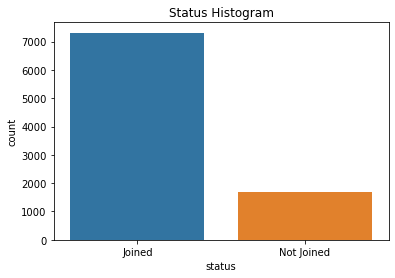

Out of 8998 applicants there are 81.0% of people who have joined the company after the final selection process while 19.0% people took backstep.


In [14]:
sns.countplot(data.status)
plt.title('Status Histogram')
plt.show()
print("Out of {} applicants there are {}% of people who have joined the company after the final selection process while {}% people took backstep.".format(data.shape[0],round(data[data.status=='Joined'].shape[0]/data.shape[0],2)*100,round(data[data.status=='Not Joined'].shape[0]/data.shape[0],2)*100))

## Categorical variable analysis

In [15]:
categorical.columns

Index(['doj_extended', 'offered_band', 'joining_bonus',
       'candidate_relocate_actual', 'gender', 'candidate_source', 'lob',
       'location', 'status'],
      dtype='object')

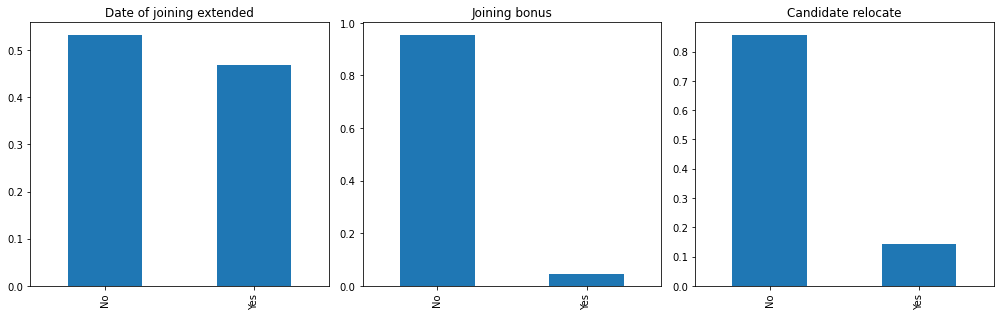

In [16]:
plt.figure(figsize=(14,4.5))

plt.subplot(1,3,1)
data['doj_extended'].value_counts(normalize=True).plot.bar(title='Date of joining extended')

plt.subplot(1,3,2)
data['joining_bonus'].value_counts(normalize=True).plot.bar(title='Joining bonus')

plt.subplot(1,3,3)
data['candidate_relocate_actual'].value_counts(normalize=True).plot.bar(title='Candidate relocate')

plt.tight_layout()
plt.show()

Inferences:
1. There is not much significant difference between the candidates who extended the joining date and candidates who did't.
2. There are very few candidates who got joining bonus and the good reason could be there extra skills, knowledge and experience.
3. Few people had to migrate to different cities in order to join the company.

In [17]:
categorical.columns

Index(['doj_extended', 'offered_band', 'joining_bonus',
       'candidate_relocate_actual', 'gender', 'candidate_source', 'lob',
       'location', 'status'],
      dtype='object')

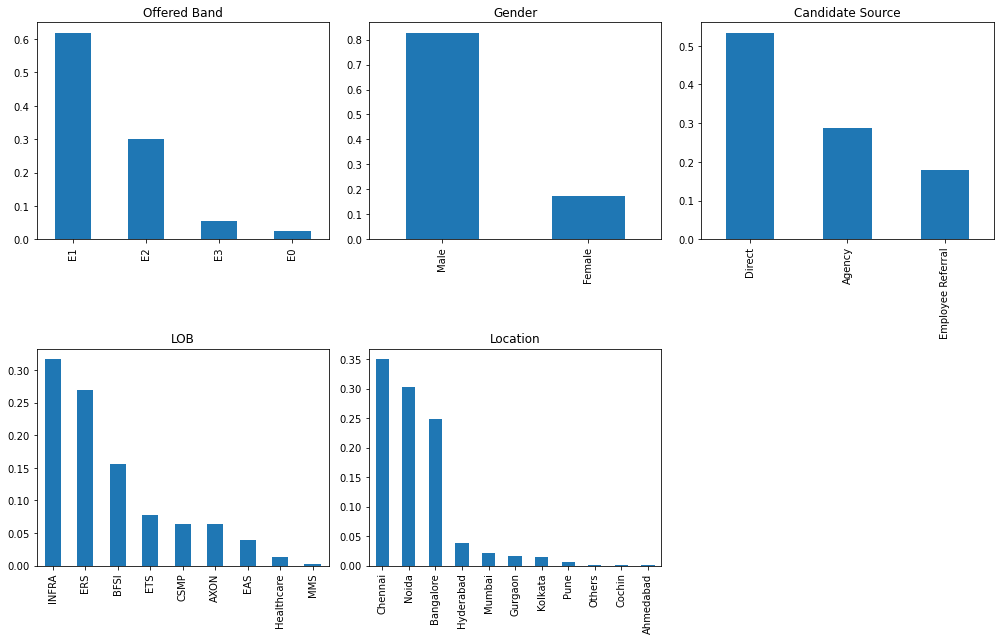

In [18]:
plt.figure(figsize=(14,9))

plt.subplot(2,3,1)
data['offered_band'].value_counts(normalize=True).plot.bar(title='Offered Band')

plt.subplot(2,3,2)
data['gender'].value_counts(normalize=True).plot.bar(title='Gender')

plt.subplot(2,3,3)
data['candidate_source'].value_counts(normalize=True).plot.bar(title='Candidate Source')

plt.subplot(2,3,4)
data['lob'].value_counts(normalize=True).plot.bar(title='LOB')

plt.subplot(2,3,5)
data['location'].value_counts(normalize=True).plot.bar(title='Location')

plt.tight_layout()
plt.show()

Inferences:
1. Almost 62% of candidates joining the company got E1 offerband followed by 30% of E2.
2. Among all the candidates there are 81% male and 19% female candidates.
3. Half of the total applied candidates contacted directly the company for job role.
4. Most of the people were offered the role of INFRA, ERS and BFSI.
5. Most of the offers was laid to the candidates from Chennai, Noida and Bangalore branch.

In [19]:
numerical.drop(['slno', 'candidate_ref'],axis=1,inplace=True)

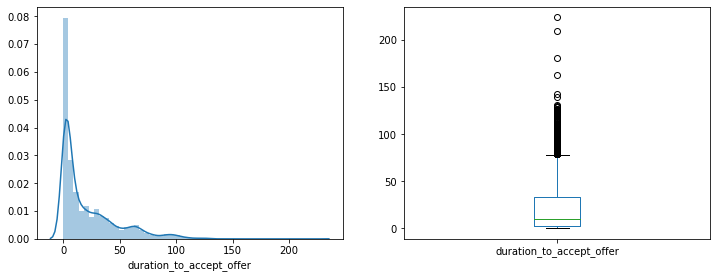

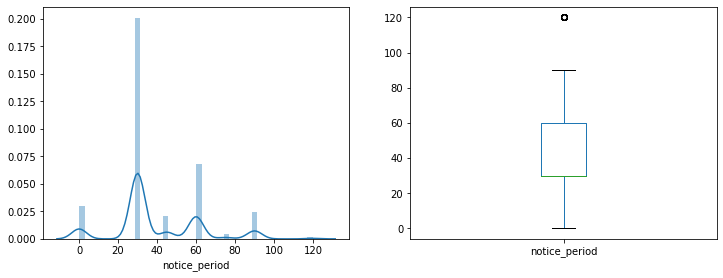

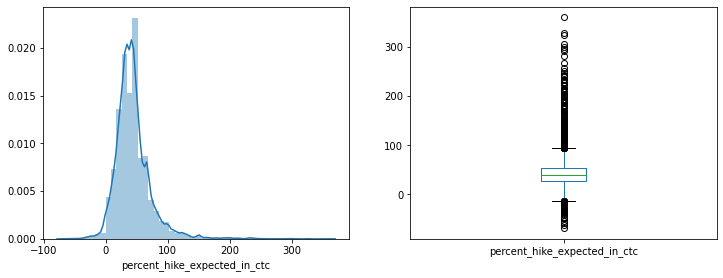

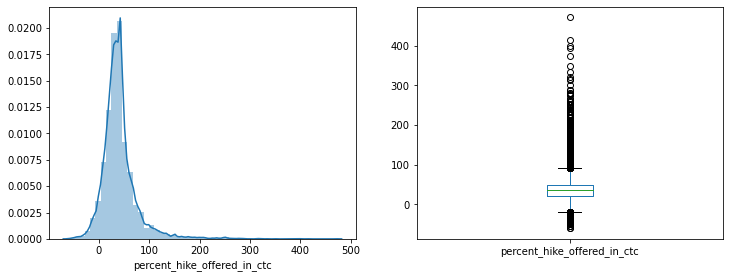

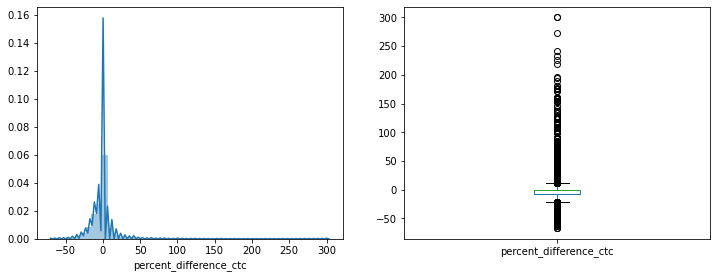

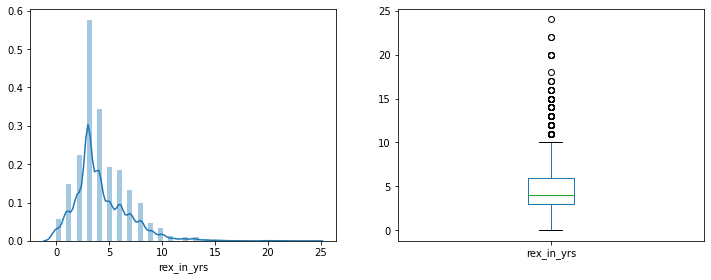

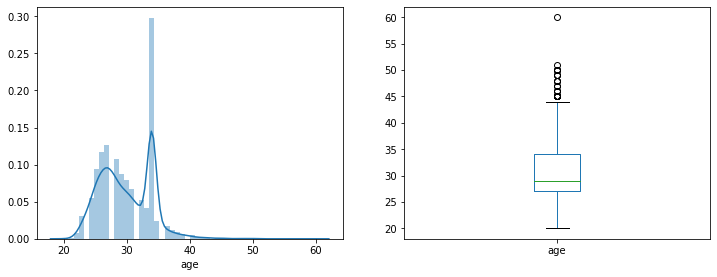

In [20]:
def var_plot(fig, x):
    plt.subplot(7,7,fig)
    sns.distplot(data[x])

    plt.subplot(7,7,fig+1)
    data[x].plot.box(figsize=(45,35))
    plt.show()

x = 1
for col in numerical.columns:
    var_plot(x, col)

Inferences:
1. There are majority of people who took no time in joining the company as soon as the offer letter came. Although, there are some people who took time to join and because of which the variable is right skewed.
2. There are lot of outliers present in the percent_hike_expected, percent_hike_offered variables and this may be due to the fact that people have their own expectations and company offer hike looking into different scenarios.
3. There are candidates who have exceptional yrs of experience which adds extra weigh to their resume and because of this there are some outliers present.
4. Most of people applying for the job ranges from 20 to 35 age group.

# Bivariate Analysis

In [21]:
categorical.columns

Index(['doj_extended', 'offered_band', 'joining_bonus',
       'candidate_relocate_actual', 'gender', 'candidate_source', 'lob',
       'location', 'status'],
      dtype='object')

In [22]:
categorical.drop('status',axis=1,inplace=True)

In [23]:
def bivariate_plot(x):
    x = pd.crosstab(data[x], data['status'])
    x.div(x.sum(1).astype(float), axis=0).plot.bar(stacked=True, figsize=(6,4))
    plt.show()

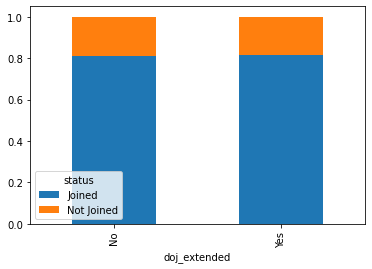

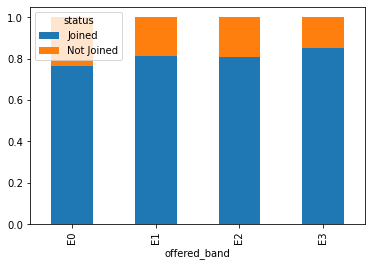

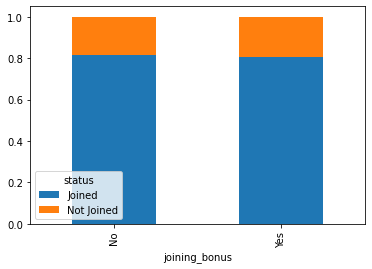

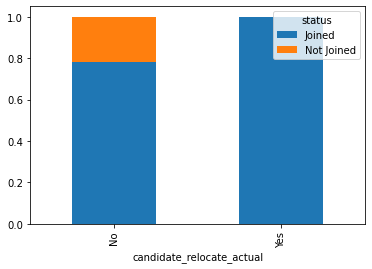

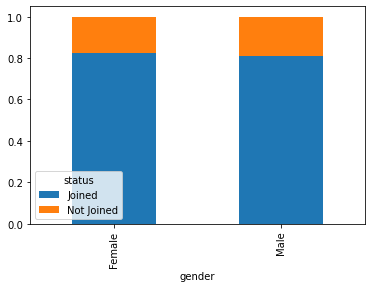

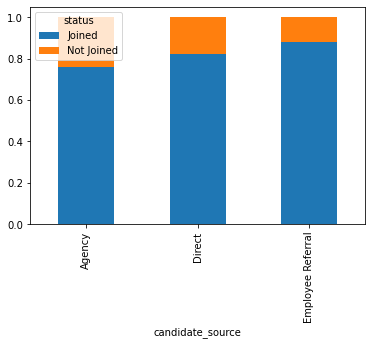

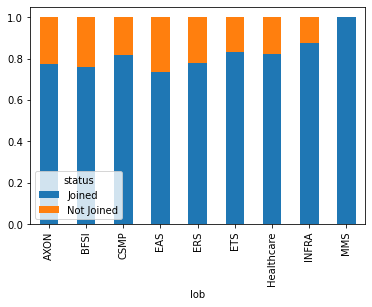

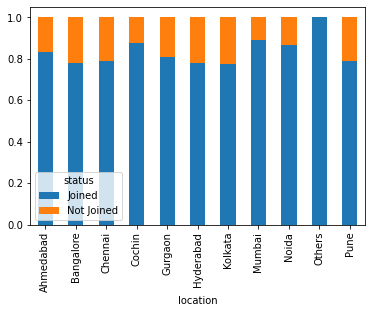

In [24]:
for col in categorical:
    bivariate_plot(col)

Inferences:
1. There is no significant difference between the candidates who extended the doj and who do not as there status remain unchanged.
2. People with different offerband have almost similar probability of joining the company.
3. Joining_bonus dosen't much influence the joining status.
4. People who have to travel to another city for job have very high chances of joining the company.
5. Male and Female candidate have equal chances of joining the company.
6. People who are reffered by the company employees have higher chances of joining.
7. People applying for the position of MMS have very high chances of joining.

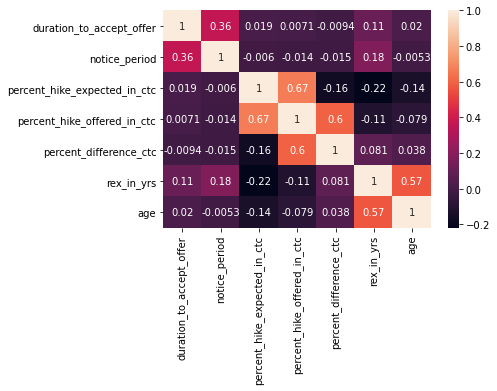

In [25]:
sns.heatmap(numerical.corr(), annot=True)

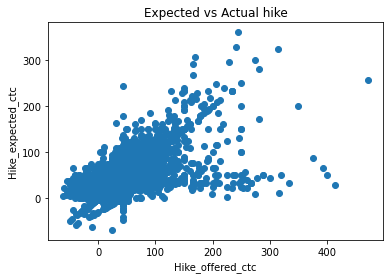

In [26]:
plt.scatter(x=data['percent_hike_offered_in_ctc'], y=data['percent_hike_expected_in_ctc'])
plt.title('Expected vs Actual hike')
plt.xlabel('Hike_offered_ctc')
plt.ylabel('Hike_expected_ctc')
plt.show()

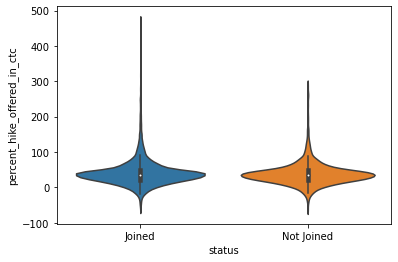

In [27]:
sns.violinplot(x='status', y= 'percent_hike_offered_in_ctc', data=data)

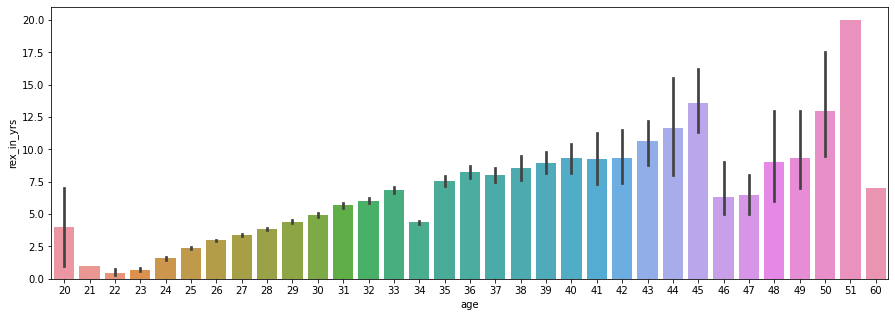

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x=data.age, y=data.rex_in_yrs)
plt.show()

# Data Preprocessing

def get_dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

for col in categorical.columns:
    data = get_dummies(col,data)

In [29]:
# data['status'] = data['status'].replace('Joined',1)
# data['status'] = data['status'].replace('Not Joined',0)

In [30]:
numerical.columns

Index(['duration_to_accept_offer', 'notice_period',
       'percent_hike_expected_in_ctc', 'percent_hike_offered_in_ctc',
       'percent_difference_ctc', 'rex_in_yrs', 'age'],
      dtype='object')

In [31]:
lower = np.quantile(numerical['duration_to_accept_offer'],0.10)
upper = np.quantile(numerical['duration_to_accept_offer'],0.90)

In [32]:
print(lower, upper)

1.0 62.0


In [33]:
numerical['duration_to_accept_offer'].skew()

1.6160134626329625

In [34]:
numerical['duration_to_accept_offer'] = np.where(numerical['duration_to_accept_offer'] <lower, lower,numerical['duration_to_accept_offer'])
numerical['duration_to_accept_offer'] = np.where(numerical['duration_to_accept_offer'] >upper, upper,numerical['duration_to_accept_offer'])
print(numerical['duration_to_accept_offer'].skew())

0.9537161003979057


In [35]:
data.drop(['slno','candidate_ref','percent_difference_ctc'], axis=1, inplace=True)

In [36]:
X = data.drop('status', axis=1)
y = data.status

In [37]:
numerical.drop('percent_difference_ctc', 1,inplace=True)

In [38]:
def get_dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

for col in categorical.columns:
    data = get_dummies(col,data)

In [39]:
len(data.columns)

34

In [40]:
def skew_check():
    skewness = {}

    for col in numerical.columns:
        skewness[col] = round(data[col].skew(),2)
    print(skewness)

In [43]:
skew_check()

{'duration_to_accept_offer': 1.62, 'notice_period': 0.74, 'percent_hike_expected_in_ctc': 2.29, 'percent_hike_offered_in_ctc': 2.75, 'rex_in_yrs': 1.29, 'age': 0.42}


In [44]:
def outlier_treat(col):
    lower = np.quantile(data[col],0.10)
    upper = np.quantile(data[col],0.90)
    
    data[col] = np.where(data[col]<lower, lower, data[col])
    data[col] = np.where(data[col]>upper, upper, data[col])

In [45]:
for col in numerical.columns:
    outlier_treat(col)

In [46]:
skew_check()

{'duration_to_accept_offer': 0.95, 'notice_period': 0.82, 'percent_hike_expected_in_ctc': 0.35, 'percent_hike_offered_in_ctc': 0.35, 'rex_in_yrs': 0.7, 'age': 0.0}


In [48]:
X = data.drop('status', axis = 1)
y = data['status']

In [49]:
X

,duration_to_accept_offer,notice_period,percent_hike_expected_in_ctc,percent_hike_offered_in_ctc,rex_in_yrs,age,Yes,E1,E2,E3,...,Bangalore,Chennai,Cochin,Gurgaon,Hyderabad,Kolkata,Mumbai,Noida,Others,Pune
0,14.0,30.0,15.38,13.16,7.0,34.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,18.0,30.0,50.00,75.00,8.0,34.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3.0,45.0,42.84,42.84,4.0,27.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,26.0,30.0,42.84,42.84,4.0,34.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,60.0,42.59,42.59,6.0,34.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,1.0,30.0,75.00,53.85,4.0,34.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8994,2.0,30.0,45.25,14.09,2.0,34.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8995,4.0,30.0,75.00,75.00,2.0,34.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8996,5.0,30.0,20.00,10.00,8.0,34.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
y.replace({'Joined' : 1, 'Not Joined' : 0}, inplace=True)

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [59]:
X[numerical.columns] = scaler.fit_transform(X[numerical.columns])

In [60]:
X.head()

,duration_to_accept_offer,notice_period,percent_hike_expected_in_ctc,percent_hike_offered_in_ctc,rex_in_yrs,age,Yes,E1,E2,E3,...,Bangalore,Chennai,Cochin,Gurgaon,Hyderabad,Kolkata,Mumbai,Noida,Others,Pune
0,0.213115,0.0,0.000000,0.077015,0.833333,1.000000,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.278689,0.0,0.580678,1.000000,1.000000,1.000000,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.032787,0.5,0.460584,0.520000,0.333333,0.222222,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.409836,0.0,0.460584,0.520000,0.333333,1.000000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.000000,1.0,0.456390,0.516269,0.666667,1.000000,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Modelling

## Model Selection

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))

for name, model in classification_models:
    kfold = KFold(n_splits=15, random_state=7)
    result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))


Logistic Regression: Mean Accuracy = 81.36% - SD Accuracy = 4.15%
K Nearest Neighbor: Mean Accuracy = 79.54% - SD Accuracy = 3.71%
Kernel SVM: Mean Accuracy = 81.40% - SD Accuracy = 4.14%
Naive Bayes: Mean Accuracy = 33.61% - SD Accuracy = 7.35%
Decision Tree: Mean Accuracy = 73.97% - SD Accuracy = 3.80%
Random Forest: Mean Accuracy = 81.55% - SD Accuracy = 4.20%


It is vissible that Logistic Regression, Kernel SVM and Random Forest have highest accuracy.

Hyperparameter tuning

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [75]:
print(X_train.shape,
     X_test.shape)

(7198, 33) (1800, 33)


In [99]:
params_grid = {'n_estimators' : [10, 25, 50, 70, 100, 150],
              'criterion' : ['gini', 'entropy','chi-square'],
              'max_depth' : [10, 20, 35, 50, 100, None],
              'min_samples_leaf' : [1, 5, 10, 15, 25],
              'max_leaf_nodes' : [1, 2, 5, 10, 15, 20, None]}

In [100]:
rf_model = RandomForestClassifier()

In [102]:
random_search = RandomizedSearchCV(rf_model, param_distributions = params_grid, n_iter = 15, cv = 10)

In [103]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'chi-square'],
                                        'max_depth': [10, 20, 35, 50, 100,
                                                      None],
                                        'max_leaf_nodes': [1, 2, 5, 10, 15, 20,
                                                           None],
                                        'min_samples_leaf': [1, 5, 10, 15, 25],
                                        'n_estimators': [10, 25, 50, 70, 100,
                                                         150]})

In [105]:
round(random_search.best_score_,2)

0.82

In [106]:
random_search.best_estimator_.n_estimators

50

In [107]:
random_search.best_estimator_.criterion

'gini'

In [108]:
random_search.best_estimator_.max_depth

10

In [111]:
random_search.best_estimator_.min_samples_leaf

1

In [114]:
random_search.best_estimator_.max_leaf_nodes

In [115]:
model = RandomForestClassifier(criterion='gini', n_estimators=50, max_depth=10)

In [116]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [118]:
y_pred = model.predict(X_test)

## Model Evaluation

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [120]:
accuracy_score(y_test,y_pred)

0.8088888888888889

In [121]:
confusion_matrix(y_test,y_pred)

array([[   9,  338],
       [   6, 1447]], dtype=int64)

Given the confusion matrix it can be said that 1447 times the model is predicting 1 when it is actually 1 and 9 times 0 when it is actually 0.